In [77]:
import numpy as np
from collections import defaultdict

# Example dataset
dataset = [
    # Sports-related sentences
    "The soccer team scored a goal in the final minute of the game.",
    "The basketball player set a new scoring record in yesterday's game.",
    "The hockey goalie's quick reflexes prevented a goal in the crucial game.",
    "The baseball pitcher's aim was to strike out the opponent and win the game.",
    "The football coach praised the team's defensive positions during the game.",

    # Political-related sentences
    "The politician outlined his economic goals for the upcoming term.",
    "The party leader set a new fundraising record for the campaign.",
    "The government's policies put it in a vulnerable position in the international arena.",
    "The president's speech during the rally set the tone for the political game ahead.",
    "The diplomat's strategic positioning helped in negotiating a peace treaty.",
]



# Tokenize the dataset
tokenized_dataset = [doc.lower().split() for doc in dataset]

# Extract unique words
unique_words = set(word for doc in tokenized_dataset for word in doc)

The `np.random.dirichlet(np.ones(2))` generates a random probability vector of length 2 where each component is between 0 and 1 and sums to 1. The Dirichlet distribution is flexible and commonly used in various statistical applications, including Bayesian modeling and natural language processing.

In [64]:
np.random.dirichlet(np.ones(2))

array([0.79530887, 0.20469113])

  1.  Initialization of Number of Senses (num_senses):
    
      `num_senses` = 2: This variable determines the number of senses or meanings that each word can have. In this case, each word is assumed to have two distinct senses. However, you can adjust num_senses to any desired number based on the context or requirements of your task.

  2. Initialization of Word Senses (word_senses):
     
     `word_senses`: This dictionary stores the sense probabilities for each unique word in the dataset. Each word is associated with a list of probabilities representing the likelihood of each sense.
        unique_words: This variable presumably contains a list of unique words extracted from the dataset.

  3.  Initialization of Sense Probabilities:
    
      `np.random.dirichlet(np.ones(num_senses))`: This part of the code generates random sense probabilities for each word using the Dirichlet distribution.
      
        `np.ones(num_senses)`: This creates an array of ones with a length equal to num_senses. The ones serve as the concentration parameters for the Dirichlet distribution, ensuring a uniform distribution of probabilities initially.
      
        `np.random.dirichlet()`: This function generates random samples from a Dirichlet distribution, which is commonly used for modeling proportions or distributions over a finite number of categories.

In [78]:
# Initialize word senses randomly
num_senses = 2
word_senses = {word: np.random.dirichlet(np.ones(num_senses)) for word in unique_words}

word_senses

{'record': array([0.16276114, 0.83723886]),
 'team': array([0.2314761, 0.7685239]),
 'scored': array([0.86932083, 0.13067917]),
 'upcoming': array([0.12914619, 0.87085381]),
 'negotiating': array([0.45671554, 0.54328446]),
 'economic': array([0.32690611, 0.67309389]),
 'hockey': array([0.96831903, 0.03168097]),
 'strategic': array([9.15179135e-04, 9.99084821e-01]),
 'defensive': array([0.11834802, 0.88165198]),
 'positioning': array([0.76436823, 0.23563177]),
 'set': array([0.36670223, 0.63329777]),
 "pitcher's": array([0.82955365, 0.17044635]),
 "yesterday's": array([0.96744701, 0.03255299]),
 'party': array([0.42360418, 0.57639582]),
 "government's": array([0.30940678, 0.69059322]),
 'put': array([0.04627626, 0.95372374]),
 'out': array([0.17395369, 0.82604631]),
 'international': array([0.57583114, 0.42416886]),
 "president's": array([0.99792389, 0.00207611]),
 'in': array([0.42025545, 0.57974455]),
 'and': array([0.05097646, 0.94902354]),
 'politician': array([0.30191334, 0.6980866

#  EM Algorithm
  1.  Initialization of Parameters:
        max_iterations = 100: This variable sets the maximum number of iterations for the EM algorithm. It controls how many times the algorithm will iteratively update the parameters to refine the word sense estimates.

  2.  EM Algorithm:
        The code iterates through the EM algorithm for a maximum of max_iterations times.
        E-step (Expectation Step):In the E-step, the algorithm computes the expected values of the latent variables given the observed data and the current parameter estimates.
        Here, word_sense_counts is a defaultdict initialized to contain arrays of zeros, each of length num_senses.
        It calculates the expected count of each word belonging to each sense.
  3.  M-step (Maximization Step):
      In the M-step, the algorithm updates the parameters to maximize the expected log-likelihood obtained from the E-step.
      It updates the word sense probabilities based on the counts obtained in the E-step.
      These steps are repeated for each iteration until convergence, or until the maximum number of iterations is reached.

  4. Interpreting Word Senses:
        After completing the EM algorithm, the code prints out the senses inferred for each word.
        It iterates through each unique word in the dataset and prints the sense probabilities associated with that word.

In [ ]:
# Maximum number of iterations for the EM algorithm
max_iterations = 100

# EM algorithm
for iteration in range(max_iterations):
    # E-step
    word_sense_counts = defaultdict(lambda: np.zeros(num_senses))
    for doc in tokenized_dataset:
        for word in doc:
            word_prob = word_senses[word]
            word_sense_counts[word] += word_prob / np.sum(word_prob)

    # M-step
    for word in unique_words:
        word_senses[word] = word_sense_counts[word] / np.sum(word_sense_counts[word])

# Interpret the senses for each word
for word in unique_words:
    print(f"Word '{word}' has senses: {word_senses[word]}")

# Visualize

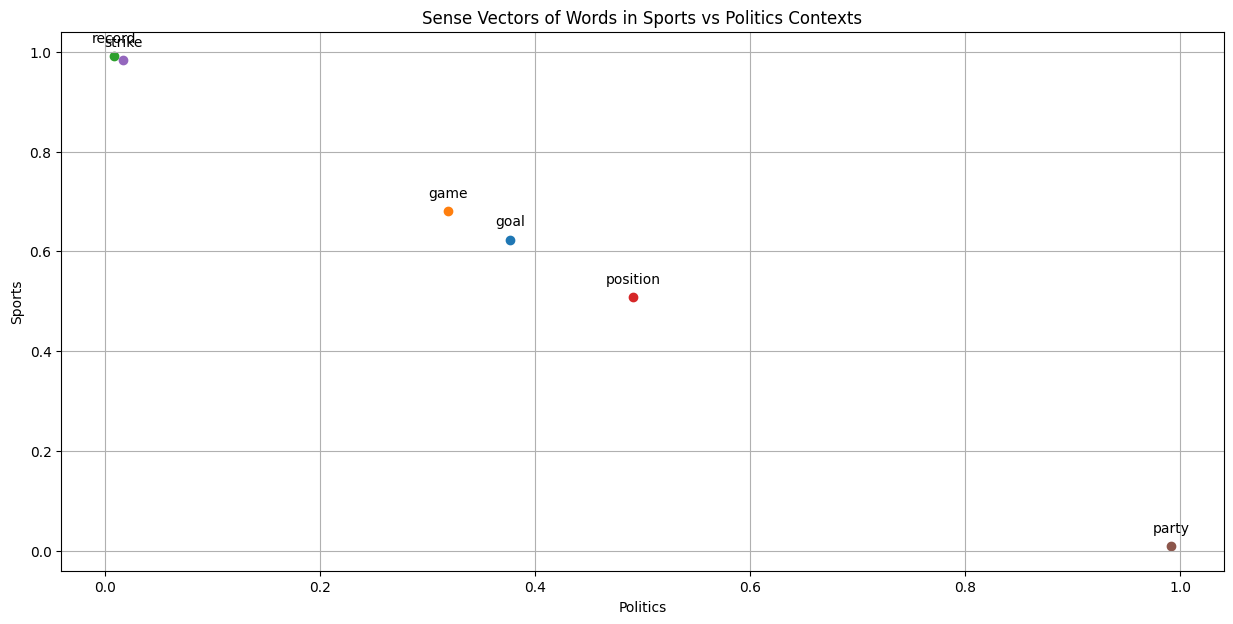

In [76]:
import matplotlib.pyplot as plt

# Words of interest
words_of_interest = ["goal", "game", "record", "position", "strike", "party"]

# Extract sense vectors for each word
word_vectors = {word: word_senses[word] for word in words_of_interest}

# Plot the sense vectors
plt.figure(figsize=(15, 7))
for word, vector in word_vectors.items():
    plt.scatter(vector[0], vector[1])
    plt.annotate(word, (vector[0], vector[1]), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
plt.xlabel('Politics')
plt.ylabel('Sports')
plt.title('Sense Vectors of Words in Sports vs Politics Contexts')
plt.grid(True)
plt.show()
